# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | LEMARCHANT HUGO - AP85480 * TAN ELODIE - TANE25619607 * JACQUES-SYLVAIN LECOINTRE LECJ19128301 |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2018                                            |
| Groupe                | C                                                       |
| Numéro du laboratoire | 02                                                      |
| Professeur            | Prof. Hervé Lombaert                                    |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 11/10/2018                                              |

DOCUMENTATION : 
Le prof a dit d'utiliser ça : http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [23]:
# -*- coding:utf-8 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os, random
import math
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.ndimage as nd
import csv
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# Hugo
pathHugo = "E:\\DocsPerso\\DocsBoulot\\ETS-MTL\\GTI770-02-SystIntel&MachineLearning\\data\\data\\images\\"
# JS
pathJS= '/Users/jslecointre/Documents/DataScience/courses/MACHINE_LEARNING/TP/data/images/'
pathElodie = '/Users/raen/Documents/UTC/ETS/GTI770/GTI770-Data/images/'
exts = ".jpg"
nb_img = "2"
path = pathElodie

## Galaxy Zoo

In [5]:
df = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
X_galaxy = df
df = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',', header=None)
Y_galaxy = df

Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

ValueError: Found input variables with inconsistent numbers of samples: [16908, 16909]

## Spam

In [6]:
df = pd.read_csv('spam.csv', delimiter = ',', header=None)
X_mail = df.loc[:, 0:56]
Y_mail = df.loc[:, 57]

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(X_mail, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

### Arbres de décision
#### Max-depth : none

In [7]:
accuracies = []
f1_scores = []

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies.append(acc)
f1_scores.append(f1)

#### Max-depth : 3

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies.append(acc)
f1_scores.append(f1)

#### Max-depth : 5

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies.append(acc)
f1_scores.append(f1)

#### Max-depth : 10

In [11]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted')

accuracies.append(acc)
f1_scores.append(f1)

### Arbres de décision - Accuracy & F1 Score

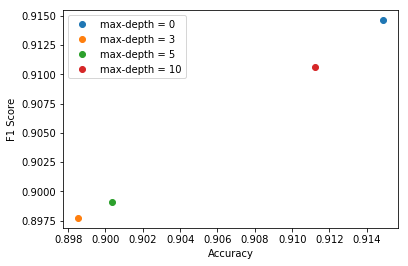

In [12]:
for i, label in zip(range(0, 4), (0, 3, 5, 10)):
    plt.plot(accuracies[i], f1_scores[i], "o", label='max-depth = {}'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

### Arbres de décision - Cross validation

D'après le graphique des Accuracy et F1 scores, on se rend compte que le meilleur hyperparamètre pour les arbres de décision pour Spam est $max-depth = None.$ On va donc effectuer la Cross-validation pour cet hyperparamètre.

In [13]:
K = 10
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(scores)/K)

0.9097984903183459


### KNN - Cross-validation
#### K = 3, Poids = 'uniform' & Poids = 'distance'

In [14]:
accuracies_uniform = []
f1_scores_uniform = []

accuracies_distance = []
f1_scores_distance = []


In [15]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')

clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies_uniform.append(acc)
f1_scores_uniform.append(f1)


clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies_distance.append(acc)
f1_scores_distance.append(f1)

#### K = 5, Poids = 'uniform' & Poids = 'distance'

In [16]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies_uniform.append(acc)
f1_scores_uniform.append(f1)


clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies_distance.append(acc)
f1_scores_distance.append(f1)

#### K = 10, Poids = 'uniform' & Poids = 'distance'

In [17]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies_uniform.append(acc)
f1_scores_uniform.append(f1)


clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies_distance.append(acc)
f1_scores_distance.append(f1)

### KNN - Accuracy & F1 Scores

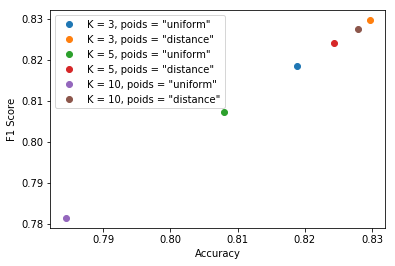

In [18]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(accuracies_uniform[i], f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(accuracies_distance[i], f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

### KNN - Cross-validation

In [19]:
K = 10
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(scores)/K)

0.8029222185756482


### Bayes Naive
#### Gaussian

In [33]:
clf = GaussianNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc_gauss = accuracy_score(Ym_test, Y_pred)
f1_gauss = f1_score(Ym_test, Y_pred, average='weighted') 

#### Multinomial

In [39]:
scaler = preprocessing.MinMaxScaler()
Xm_scaled = scaler.fit_transform(X_mail)

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(Xm_scaled) 

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm_scaled, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

clf = MultinomialNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_train)

acc_multi = accuracy_score(Ym_test, Y_pred)
f1_multi = f1_score(Ym_test, Y_pred, average='weighted') 

/Users/raen/anaconda3/envs/gti770_env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


ValueError: Found input variables with inconsistent numbers of samples: [552, 2208]

## Question 1
### Méthode de création des ensembles de données

## Question 1
### Détails des ensembles produits

## Question 2
### Approche de validation proposée et justification

## Question 3
### Matrice des expérimentations

## Question 3
### Étude des hyperparamètres et des modèles

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

## Question 6
### Discussion sur la nature des données

## Question 7
### Recommandations

## Question 8
### Améliorations possibles